# Machine Learning With Python | Final Project |

In this notebook I have try to practice all classification algorithms that I have learnt in this course.

### Importing the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### About Dataset

This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                     |
| -------------- | ----------- |
| Loan_Status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount                                                           |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-20 18:48:09--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-12-20 18:48:09 (1.23 MB/s) - ‘loan_train.csv’ saved [23101/23101]



## Load Data from csv file

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and Analysis

Let's see howw many each classes in our dataset

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
df.shape

(346, 10)

By this we get to know that 260 people have paid off the loan on time while 86 have gone into collection.

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

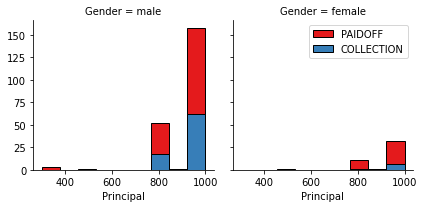

In [10]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
grid = sns.FacetGrid(df, col="Gender",hue='loan_status' ,palette="Set1",col_wrap=2)
grid.map(plt.hist, "Principal", bins=bins,ec='k')
grid.axes[-1].legend()
plt.show()

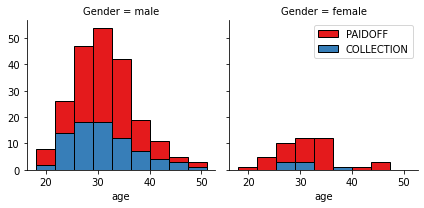

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
grid = sns.FacetGrid(df, col="Gender",hue='loan_status' ,palette="Set1",col_wrap=2)
grid.map(plt.hist, "age", bins=bins,ec='k')
grid.axes[-1].legend()
plt.show()

lets take a look at the day of the week people get the loan

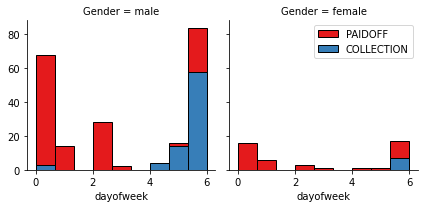

In [12]:
df['dayofweek']=df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
grid = sns.FacetGrid(df, col="Gender",hue='loan_status' ,palette="Set1",col_wrap=2)
grid.map(plt.hist, "dayofweek", bins=bins,ec='k')
grid.axes[-1].legend()
plt.show()

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [14]:
df['weekend'].value_counts()

1    205
0    141
Name: weekend, dtype: int64

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

It means female paid their 86% of loan while male paid their 73% of loan. So converting male to 0 and female to 1.

In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [17]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

## One hot Encoding

As we can see Master or Above have paid only 50% of loan. Therefore it will be droped from the dataset.

In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
X=Feature
Y=df['loan_status'].values
Y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

(array([[  0.,   0.,   0.,   3.,   0.,   2.,   0.,   0.,  81., 260.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 8 BarContainer objects>)

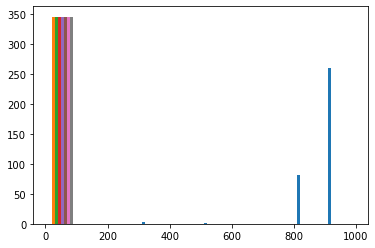

In [21]:
plt.hist(X)

## Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

(array([[  3.,   2.,   0.,   0.,  81.,   2., 258.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  14., 148.,   0., 184.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  26., 108., 124.,  57.,  24.,   7.],
        [  0.,   0.,   0.,   0.,   0., 294.,   0.,   0.,  52.,   0.],
        [  0.,   0.,   0.,   0.,   0., 141.,   0., 205.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 302.,   0.,   0.,   0.,  44.],
        [  0.,   0.,   0.,   0.,   0., 195.,   0., 151.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 197.,   0., 149.,   0.,   0.]]),
 array([-5.89052444, -4.96882824, -4.04713204, -3.12543584, -2.20373963,
        -1.28204343, -0.36034723,  0.56134897,  1.48304517,  2.40474138,
         3.32643758]),
 <a list of 8 BarContainer objects>)

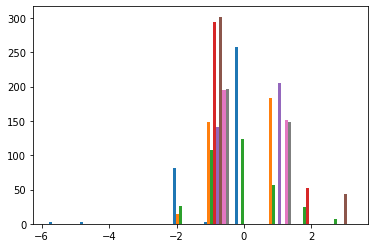

In [23]:
plt.hist(X)

# Classification

I have used four classification algorithm :-

## i) K Nearest Neighbor (KNN)

Before proceeding I have to evaluate the accuracy of model by using jaccard similarity score, f1 score, log loss.

In [24]:
from sklearn.metrics import f1_score, log_loss, jaccard_similarity_score

Splitting the dataset into 80% of training set and 20% testing set.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [26]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

mean_accuracy = []

for n in range(1,10):
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))
    
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.6428571428571429 
k = 2 has a Score = 0.5571428571428572 
k = 3 has a Score = 0.7142857142857143 
k = 4 has a Score = 0.6285714285714286 
k = 5 has a Score = 0.7571428571428571 
k = 6 has a Score = 0.6571428571428571 
k = 7 has a Score = 0.7571428571428571 
k = 8 has a Score = 0.7142857142857143 
k = 9 has a Score = 0.7 


Text(0, 0.5, 'Testing Accuracy Values')

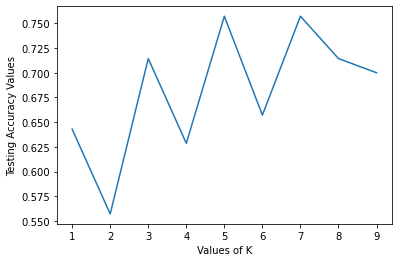

In [29]:
plt.plot(range(1,10), mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

From this we can select K=7 for our KNN model.

In [30]:
knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
#knn_yhat = knn_model.predict(X_test)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [31]:
print("Train set Accuracy (Jaccard): ", jaccard_similarity_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", jaccard_similarity_score(y_test, knn_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.8079710144927537
Test set Accuracy (Jaccard):  0.7571428571428571
Train set Accuracy (F1):  0.7968388478294434
Test set Accuracy (F1):  0.7428571428571429


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
for d in range(1,10):
    dct = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dct.fit(X_train,y_train)
    predTree = dct.predict(X_test)
    print("For depth d = {} the DecisionTrees's Accuracy = {}".format(d,accuracy_score(y_test, predTree)))

For depth d = 1 the DecisionTrees's Accuracy = 0.8285714285714286
For depth d = 2 the DecisionTrees's Accuracy = 0.8285714285714286
For depth d = 3 the DecisionTrees's Accuracy = 0.8
For depth d = 4 the DecisionTrees's Accuracy = 0.7
For depth d = 5 the DecisionTrees's Accuracy = 0.6428571428571429
For depth d = 6 the DecisionTrees's Accuracy = 0.6714285714285714
For depth d = 7 the DecisionTrees's Accuracy = 0.7142857142857143
For depth d = 8 the DecisionTrees's Accuracy = 0.7142857142857143
For depth d = 9 the DecisionTrees's Accuracy = 0.7428571428571429


The best value of depth is d = 2. 

In [34]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
print("Train set Accuracy (Jaccard): ", jaccard_similarity_score(y_train, dct.predict(X_train)))
print("Test set Accuracy (Jaccard): ", jaccard_similarity_score(y_test, dct.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, dct.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dct.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7318840579710145
Test set Accuracy (Jaccard):  0.8285714285714286
Train set Accuracy (F1):  0.6185798314232005
Test set Accuracy (F1):  0.7508928571428571


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3



pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package 

In [37]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [38]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [39]:
info=df[:]
info.drop(["loan_status"],axis=1)

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


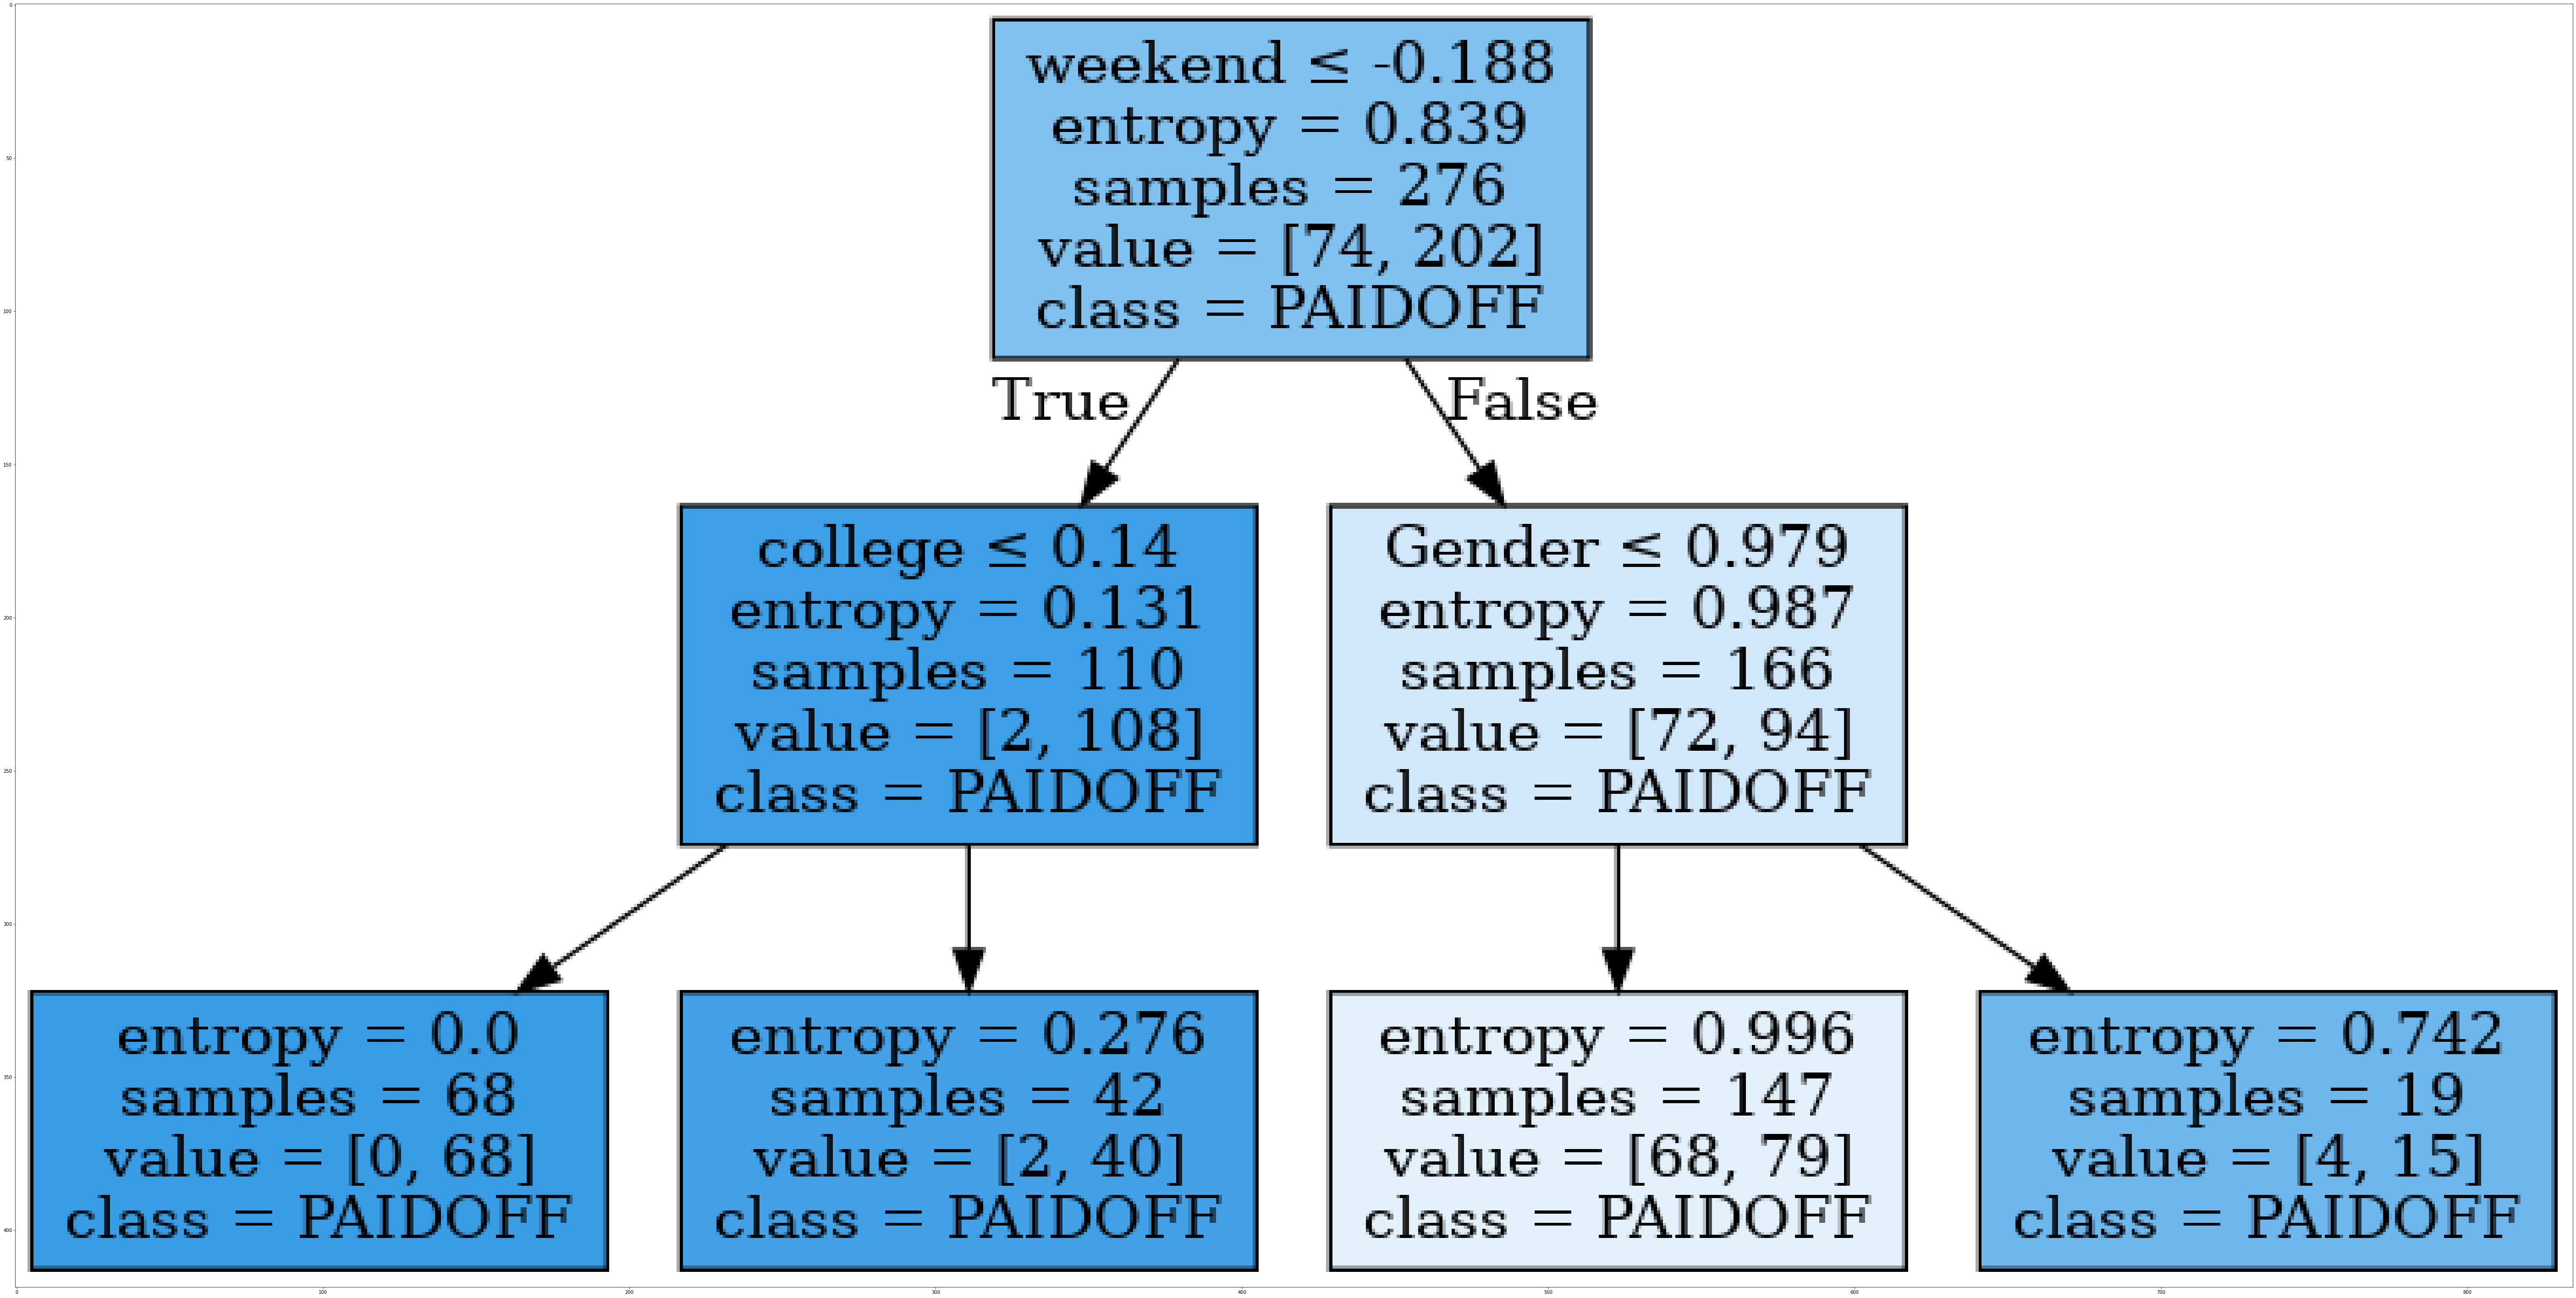

In [40]:
dot_data = StringIO()
filename = "LoanTree.png"
featureNames = Feature.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(dct,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## iii) SVM Classifier

In [41]:
from sklearn import svm 

In [42]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.7508928571428571
For kernel: poly, the f1 score is: 0.7365079365079366
For kernel: rbf, the f1 score is: 0.7365079365079366
For kernel: sigmoid, the f1 score is: 0.7365079365079366


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: Fut

We can see the kernel linear has the best f1 score of 0.7508928571428571

In [43]:
best_svm = svm.SVC(kernel='linear').fit(X_train,y_train)
best_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
print("Train set Accuracy (Jaccard): ", jaccard_similarity_score(y_train, best_svm.predict(X_train)))
print("Test set Accuracy (Jaccard): ", jaccard_similarity_score(y_test, best_svm.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, best_svm.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7318840579710145
Test set Accuracy (Jaccard):  0.8285714285714286
Train set Accuracy (F1):  0.6185798314232005
Test set Accuracy (F1):  0.7508928571428571


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# iv) Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression 

In [46]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4529024775789561
When Solver is saga, logloss is : 0.45290261740419363
When Solver is liblinear, logloss is : 0.5596633457155463
When Solver is newton-cg, logloss is : 0.4529024348154771
When Solver is sag, logloss is : 0.45289476190322864


We can see that the best solver is liblinear

In [48]:
best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
best_lr_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
print("Train set Accuracy (Jaccard): ", jaccard_similarity_score(y_train, best_lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", jaccard_similarity_score(y_test, best_lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7137681159420289
Test set Accuracy (Jaccard):  0.8142857142857143
Train set Accuracy (F1):  0.6991173993518938
Test set Accuracy (F1):  0.7813349730135957


# Model Evaluation using test set

First, download and load the test set:

In [50]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-20 19:03:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-20 19:03:42 (7.25 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation

In [51]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Data Preprocessing

In [52]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [56]:
# jaccard_similarity_score

# KNN
knn_yhat = knn_model.predict(x_loan_test)
jacc1 = round(jaccard_similarity_score(y_loan_test, knn_yhat), 2)

# Decision Tree
dt_yhat = dct.predict(x_loan_test)
jacc2 = round(jaccard_similarity_score(y_loan_test, dt_yhat), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
jacc3 = round(jaccard_similarity_score(y_loan_test, svm_yhat), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
jacc4 = round(jaccard_similarity_score(y_loan_test, lr_yhat), 2)

jss = [jacc1, jacc2, jacc3, jacc4]
jss

[0.72, 0.74, 0.74, 0.78]

In [58]:

# KNN
knn_yhat = knn_model.predict(x_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = dct.predict(x_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
f3 = round(f1_score(y_loan_test, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.71, 0.63, 0.63, 0.73]

In [59]:
lr_prob = best_lr_model.predict_proba(x_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.57]

In [60]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.72,0.71,NA
Decision Tree,0.74,0.63,NA
SVM,0.74,0.63,NA
Logistic Regression,0.78,0.73,0.57
